抓取第 1 頁: https://udn.com/api/more?page=1&channelId=1&cate_id=0&type=breaknews
抓取第 2 頁: https://udn.com/api/more?page=2&channelId=1&cate_id=0&type=breaknews
抓取第 3 頁: https://udn.com/api/more?page=3&channelId=1&cate_id=0&type=breaknews
抓取第 4 頁: https://udn.com/api/more?page=4&channelId=1&cate_id=0&type=breaknews
抓取第 5 頁: https://udn.com/api/more?page=5&channelId=1&cate_id=0&type=breaknews


Building prefix dict from the default dictionary ...


✅ 爬取完成，共抓到 100 篇新聞，已存入 udn_news.csv


Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.809 seconds.
Prefix dict has been built successfully.


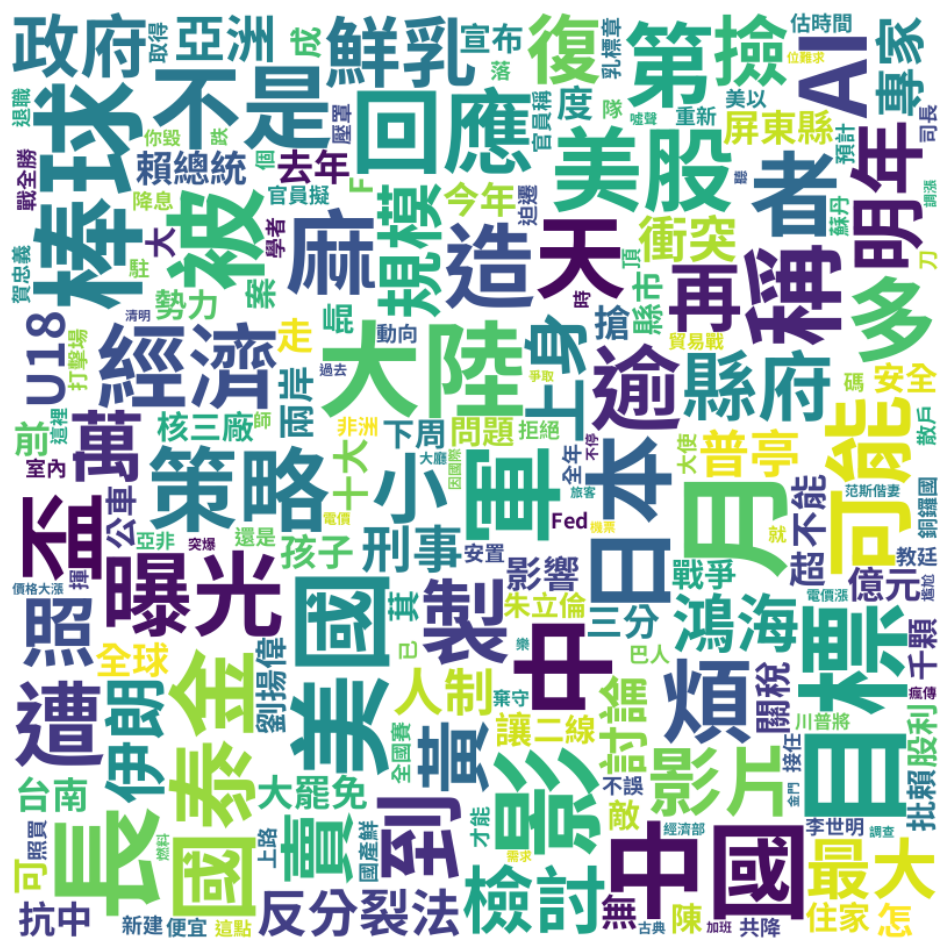

In [ ]:
#套件
import time
import random
import requests
import pandas as pd
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import cv2

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
}

def get_news_list(page_num = 20):
    """爬取新聞標題"""
    base_url = "https://udn.com/api/more"

    news_titles = []
    for page in range(1, page_num + 1):
        query = f"page={page}&channelId=1&cate_id=0&type=breaknews"
        news_list_url = f"{base_url}?{query}"

        print(f"抓取第 {page} 頁: {news_list_url}")
        
        r = requests.get(news_list_url, headers=HEADERS)
        news_data = r.json()
        
        # 提取標題
        news_titles.extend([
            {
                "標題": news.get('title', '標題未知'),
                "連結": "https://udn.com" + news.get('url', '#'),
                "時間": news.get('time', '時間未知'),
            }
            for news in news_data['lists']
        ])
        
        time.sleep(random.uniform(1, 2))

    return news_titles

if __name__ == "__main__":
    news_list = get_news_list(page_num=5)

    # 存成 DataFrame 並寫入 CSV
    df = pd.DataFrame(news_list)
    filename = f"udn_news.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')

    print(f"✅ 爬取完成，共抓到 {len(news_list)} 篇新聞，已存入 {filename}")

csv_file = 'udn_news.csv'  # 這裡換成你的 CSV 檔案路徑
df = pd.read_csv('udn_news.csv')

# 提取所有標題，並將缺失值（NaN）排除
text = " ".join(df['標題'].dropna())

#停用詞
stopwords = """的
了
在
是
我
有
和
不
人
都
一
對
說
要
來
這
他
也
為
以
上
下
為什麼
所以
那
把
它
你
她
我們的
他們
他們的
來自
可以
去
這些
會
還
的
為了
如果
但
之後
當
會
此
其
從
等
更多
因
己
後
變
與
又
"""

# 將停用詞保存到文件
with open("stopwords.txt", "w", encoding="utf-8") as file:
    file.write(stopwords.strip())

stopwords_path= r"./stopwords.txt"  # 若有停用詞檔案，這裡換成你的停用詞檔案路徑
def load_stopwords(stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as f:
        return set(f.read().splitlines())
stopwords = load_stopwords(stopwords_path)

# 使用 jieba 進行中文斷詞
segmented_text = " ".join([word for word in jieba.cut(text) if word not in stopwords])

# 確認字型路徑
font = r"./NotoSansTC-Bold.ttf"  # 這裡換成你的字型路徑

# 生成文字雲
wordcloud = WordCloud(
    font_path=font,
    width=800,  # 加大尺寸以獲得更好的效果
    height=800,
    background_color='white',
    contour_width=2,
    contour_color='gray',
    min_font_size=10,
    max_font_size=100,
    prefer_horizontal=0.7,
    collocations=False
).generate(segmented_text)


# 顯示文字雲
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")  # 存檔